This notebook we try to use Ernest Chan's ideas on Conditional Probability (https://www.youtube.com/watch?v=nBy7b_oZ7mE) to improve an options selling strategy introduced by "Quant Galore" (https://quantgalore.substack.com/p/selling-volatility-the-right-way).
As the results are based on a paid subscription, I do not show the original code but with permission of the author show the output of the option trades.

In [1]:
import requests
import pandas as pd
import numpy as np
#import mysql.connector

import sqlalchemy
import matplotlib.pyplot as plt
import yfinance as yf

from datetime import datetime, timedelta
from pandas_market_calendars import get_calendar

C:\Users\vwste\AppData\Local\Temp\ipykernel_64376\2438228741.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
all_trades = pd.read_csv("./data/trades.csv")
all_trades.set_index("date", inplace = True)
all_trades.index = pd.to_datetime(all_trades.index, utc=True).tz_convert("America/New_York")

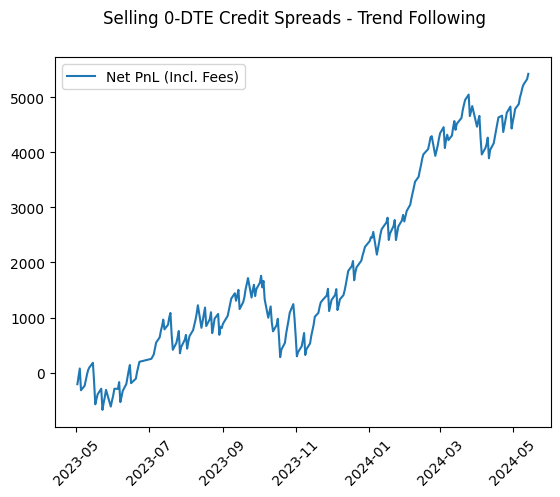

EV per trade: $20.0
Win Rate: 79.0%
Avg Profit: $106.76
Avg Loss: $-304.55
Total Profit: $5424.999999999997


In [3]:
###
aum = 2000
monthly = all_trades.resample("ME").sum(numeric_only=True)

total_return = round(((all_trades["net_capital"].iloc[-1]) / aum)*100, 2)
sd = round(all_trades["gross_pnl_percent"].std(), 2)

wins = all_trades[all_trades["net_pnl"] > 0]
losses = all_trades[all_trades["net_pnl"] < 0]

avg_win = wins["net_pnl"].mean()
avg_loss = losses["net_pnl"].mean()

win_rate = round(len(wins) / len(all_trades), 2)

expected_value = round((win_rate * avg_win) + ((1-win_rate) * avg_loss), 2)

plt.figure(dpi=100)
plt.xticks(rotation=45)
plt.suptitle("Selling 0-DTE Credit Spreads - Trend Following")
plt.plot(all_trades.index, all_trades["net_capital"])
plt.legend(["Net PnL (Incl. Fees)"])
plt.show()


print(f"EV per trade: ${expected_value*100}")
print(f"Win Rate: {win_rate*100}%")
print(f"Avg Profit: ${round(avg_win*100,2)}")
print(f"Avg Loss: ${round(avg_loss*100,2)}")
print(f"Total Profit: ${all_trades['net_pnl'].sum()*100}");

In [4]:
all_trades.index = pd.to_datetime(all_trades.index).date

In [5]:
all_trades.tail(20)

,cost,final_price,gross_pnl,gross_pnl_percent,ticker,direction,max_loss,contracts,fees,net_pnl,net_capital
2024-04-17,1.25,0.00,1.25,100.00,I:SPX,0,3.75,1,0.04,1.21,4406.0
2024-04-18,1.20,0.00,1.20,100.00,I:SPX,0,3.80,1,0.04,1.16,4522.0
2024-04-19,1.16,0.00,1.16,100.00,I:SPX,0,3.84,1,0.04,1.12,4634.0
2024-04-22,1.00,0.65,0.35,35.00,I:SPX,0,4.00,1,0.04,0.31,4665.0
2024-04-23,1.31,4.23,-2.92,-222.90,I:SPX,0,3.69,1,0.04,-2.96,4369.0
2024-04-24,1.20,0.00,1.20,100.00,I:SPX,0,3.80,1,0.04,1.16,4485.0
2024-04-25,1.30,0.15,1.15,88.46,I:SPX,0,3.70,1,0.04,1.11,4596.0
2024-04-26,1.28,0.00,1.28,100.00,I:SPX,0,3.72,1,0.04,1.24,4720.0
2024-04-29,1.15,0.00,1.15,100.00,I:SPX,0,3.85,1,0.04,1.11,4831.0
2024-04-30,1.05,5.86,-3.95,-458.10,I:SPX,1,3.95,1,0.04,-3.99,4432.0


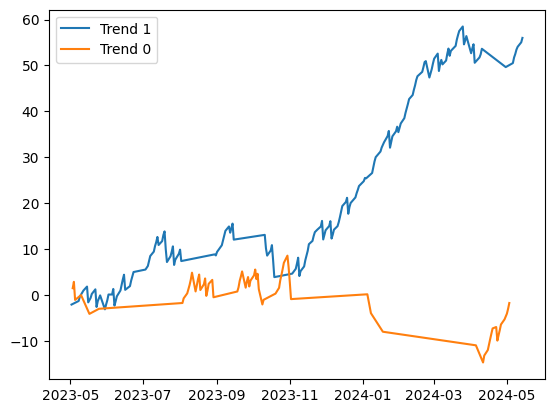

In [6]:
plt.plot(all_trades[all_trades['direction']==1]['net_pnl'].cumsum(), label = 'Trend 1')
plt.plot(all_trades[all_trades['direction']==0]['net_pnl'].cumsum(), label = 'Trend 0')
plt.legend()

In [7]:
len(all_trades[all_trades['direction']==0])/all_trades.shape[0]

0.2823529411764706

In [8]:
learning_var = all_trades[["net_pnl"]].copy()
learning_var['y'] = np.where(learning_var["net_pnl"] > 0, 1, 0)

learning_var

,net_pnl,y
2023-05-02,-2.10,0
2023-05-03,1.47,1
2023-05-04,1.38,1
2023-05-05,-3.94,0
2023-05-08,0.78,1
...,...,...
2024-05-08,0.76,1
2024-05-09,0.96,1
2024-05-10,0.61,1
2024-05-13,0.98,1


In [9]:
learning_var['y'].value_counts(normalize=True)

y
1    0.792157
0    0.207843
Name: proportion, dtype: float64

In [10]:
def download_data(symbol):
    data = yf.download(symbol)
    return data

In [11]:
data = yf.download('^SPX', '2018-01-01')

[*********************100%%**********************]  1 of 1 completed


In [12]:
def hull_moving_average(close_prices, window: int):
	"""
	Calculate the Hull Moving Average (HMA) of a given time series.
 
	Args:
		close_prices (np.ndarray): The input close prices.
		window (int): The window for the HMA.
  
	Returns:
		hma (np.ndarray): The Hull Moving Average values.
	"""
	_ema = 2 * close_prices.ewm(span=window // 2).mean() - close_prices.ewm(span=window).mean()
	hma = _ema.ewm(span=int(np.sqrt(window))).mean()/close_prices - 1
	return hma

def calculate_atr(high_data, low_data, close_data, window=14):
    tr = pd.concat([high_data - low_data, 
                    abs(high_data - close_data.shift(1)), 
                    abs(low_data - close_data.shift(1))], axis=1).max(axis=1)
    atr = tr.rolling(window=window).mean()
    return atr

In [13]:
lags = [10, 20, 30, 60]
feats = data[['Open', 'Adj Close', 'Volume', 'High', 'Low']].copy()
feats.columns = ['Open','Close', 'Volume', 'High', 'Low']
feats['returns'] = np.log(feats['Close']).diff()

for lag in lags:
    
    feats[f'dist_ma_{lag}'] = feats['Close'] / feats['Close'].rolling(window=lag).mean()
    feats[f'std_{lag}'] = feats['returns'].rolling(window=lag).std()
    feats[f'mean_{lag}'] = feats['returns'].rolling(window=lag).mean()
    feats[f'skew_ma_{lag}'] = feats['returns'].rolling(window=lag).skew()
    feats[f'vol_ma_{lag}'] = feats['Volume'].rolling(window=lag).mean()
    feats[f'hma_{lag}'] = hull_moving_average(feats['Close'], lag)

feats['atr'] = calculate_atr(data['High'], data['Low'], data['Close'])
feats[f'logMA5_20'] = feats['Close'].rolling(5).mean() - feats['Close'].rolling(20).mean()
feats[f'logMA1_5'] = feats['Close'] - feats['Close'].rolling(5).mean()

vol_short = feats['returns'].rolling(20).std()
vol_long = feats['returns'].rolling(60).std()
mean_short = feats['returns'].rolling(20).mean()
mean_long = feats['returns'].rolling(60).mean()

feats[f'realVolatility_20_60'] = vol_short - vol_long
feats[f'sharpe_10'] = mean_short/vol_short

ma_20_hl = (np.log(feats['High']) - np.log(feats['Low'])).rolling(window=20).mean()
feats[f'HL_20_realVol_20'] = ma_20_hl/vol_short 

In [15]:
import math


class VolatilityEstimator():
    
    def __init__(self, price_data, estimation_method='parkison', window=30):
        self.price_data = price_data
        self.estimation_method = estimation_method
        self.window = window
        self.trading_periods = 252
        self.clean = False
        
    def __call__(self):
        if self.estimation_method == 'parkinson':
            return self.parkinson()
        elif self.estimation_method == 'close':
            return self.close()
        elif self.estimation_method == 'natr':
            return self.natr()
        elif self.estimation_method == 'rogers_satchell':
            return self.rogers_satchell()
        elif self.estimation_method == 'yang_zhang':
            return self.yang_zhang()
        elif self.estimation_method == 'german_klass':
            return self.german_klass()
        else:
            raise ValueError(f"Invalid estimation method: {self.estimation_method}")
    
    
    def close(self):
        rs = self.price_data['Close'].pct_change()
        result = rs.rolling(window=self.window, min_periods=1).std() * math.sqrt(self.trading_periods)
        
        if self.clean:
            return result.dropna()
        else:
            return result
    
        
    def parkinson(self, trading_periods=252):
        
        rs = (1.0 / (4.0 * math.log(2.0))) * ((self.price_data['High'] / self.price_data['Low']).apply(np.log))**2.0

        def f(v):
            return (self.trading_periods * v.mean())**0.5
        
        result = rs.rolling(
            window=self.window,
            min_periods=1,
            center=False
        ).apply(func=f)
        
        if self.clean:
            return result.dropna()
        else:
            return result
        
    def rogers_satchell(self):
        log_ho = (self.price_data['High'] / self.price_data['Open']).apply(np.log)
        log_lo = (self.price_data['Low'] / self.price_data['Open']).apply(np.log)
        log_co = (self.price_data['Close'] / self.price_data['Open']).apply(np.log)
        
        rs = log_ho * (log_ho - log_co) + log_lo * (log_lo - log_co)

        def f(v):
            return (self.trading_periods * v.mean())**0.5
        
        result = rs.rolling(
            window=self.window,
            min_periods=1,
            center=False
        ).apply(func=f)
        
        if self.clean:
            return result.dropna()
        else:
            return result
        
    def yang_zhang(self):
        
        log_ho = (self.price_data['High'] / self.price_data['Open']).apply(np.log)
        log_lo = (self.price_data['Low'] / self.price_data['Open']).apply(np.log)
        log_co = (self.price_data['Close'] / self.price_data['Open']).apply(np.log)
        
        log_oc = (self.price_data['Open'] / self.price_data['Close'].shift(1)).apply(np.log)
        log_oc_sq = log_oc**2
        
        log_cc = (self.price_data['Close'] / self.price_data['Close'].shift(1)).apply(np.log)
        log_cc_sq = log_cc**2
        
        rs = log_ho * (log_ho - log_co) + log_lo * (log_lo - log_co)
        
        close_vol = log_cc_sq.rolling(window=self.window, center=False, min_periods=1).sum() * (1.0 / (self.window - 1.0))
        open_vol = log_oc_sq.rolling(window=self.window, center=False, min_periods=1).sum() * (1.0 / (self.window - 1.0))
        window_rs = rs.rolling(window=self.window, center=False, min_periods=1).sum() * (1.0 / (self.window - 1.0))

        k = 0.34 / (1.34 + (self.window + 1) / (self.window - 1))
        result = (open_vol + k * close_vol + (1 - k) * window_rs).apply(np.sqrt) * math.sqrt(self.trading_periods)

        if self.clean:
            return result.dropna()
        else:
            return result
        
    def german_klass(self):
        log_hl = (self.price_data['High'] / self.price_data['Low']).apply(np.log)
        log_co = (self.price_data['Close'] / self.price_data['Open']).apply(np.log)

        rs = 0.5 * log_hl**2 - (2*math.log(2)-1) * log_co**2
        
        def f(v):
            return (self.trading_periods * v.mean())**0.5
        
        result = rs.rolling(window=self.window, center=False, min_periods=1).apply(func=f)
        
        if self.clean:
            return result.dropna()
        else:
            return result
        
    def skew(self):
        log_return = (self.price_data['Close'] / self.price_data['Close'].shift(1)).apply(np.log)
    
        result = log_return.rolling(
            window=self.window,
            min_periods=1,
            center=False
        ).skew()

        if self.clean:
            return result.dropna()
        else:
            return result
    




In [16]:
feats['vol_parkinson'] = VolatilityEstimator(price_data=data, estimation_method='parkinson', window=20)()
feats['vol_rogers_satchell'] = VolatilityEstimator(price_data=data, estimation_method='rogers_satchell', window=20)()
feats['vol_yang_zhang'] = VolatilityEstimator(price_data=data, estimation_method='yang_zhang', window=20)()

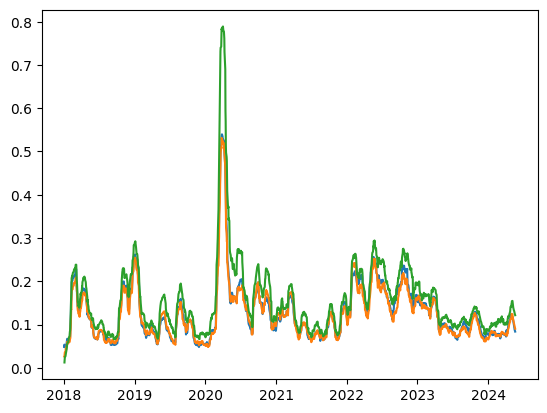

In [17]:
plt.plot(feats['vol_parkinson'])
plt.plot(feats['vol_rogers_satchell'])
plt.plot(feats['vol_yang_zhang'])

In [18]:
feature_tickers = ['^VIX', '^VVIX', '^SKEW']
ticker_data = {symbol: download_data(symbol) for symbol in list(feature_tickers)}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
for col in feature_tickers:
    ticker_name = col.replace('^', '')
    close = ticker_data[col]['Close'].ffill()
    
    for lookback in [5, 20]:
        feats[f'{ticker_name}_MA_{lookback}'] = close.rolling(lookback, min_periods=1).mean()
        feats[f'{ticker_name}_STD_{lookback}'] = close.rolling(lookback, min_periods=1).std()

    feats[f'{ticker_name}_logMA5_20'] = close.rolling(5).mean() - close.rolling(20).mean()
    feats[f'{ticker_name}_logMA1_5'] = close - close.rolling(5).mean()

import talib as ta
feats['atr'] = ta.ATR(feats['High'], feats['Low'], feats['Close'], timeperiod=14)
feats['RSI'] = ta.RSI(feats['Close'], timeperiod=14)
feats['MACD'], _, _ = ta.MACD(feats['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [20]:
feats_orig = feats.copy()
for col in ['Open', 'Close', 'Volume', 'returns', 'High', 'Low', 'VIX']:
    if col in feats.columns:
        del feats[col]
feats = feats.ffill().dropna(axis=0)
feats = feats.shift()
feats.tail()

,dist_ma_10,std_10,mean_10,skew_ma_10,vol_ma_10,hma_10,dist_ma_20,std_20,mean_20,skew_ma_20,...,VVIX_MA_20,VVIX_STD_20,VVIX_logMA5_20,VVIX_logMA1_5,SKEW_MA_5,SKEW_STD_5,SKEW_MA_20,SKEW_STD_20,SKEW_logMA5_20,SKEW_logMA1_5
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-14,1.014649,0.008137,0.002036,-0.988866,4.004751e+09,-0.000411,1.024514,0.007472,0.001552,-0.378206,...,82.6455,9.042730,-7.921499,2.826003,136.058002,2.664321,135.029501,2.831642,1.028501,3.591992
2024-05-15,1.015394,0.005173,0.004104,0.330947,4.072862e+09,-0.002271,1.027502,0.007455,0.001896,-0.523159,...,81.5655,8.206435,-6.219499,2.304001,137.366000,2.783172,135.230500,3.050343,2.135500,2.813992
2024-05-16,1.021562,0.004922,0.005613,0.194923,4.054526e+09,-0.008747,1.036638,0.007528,0.002769,-0.706672,...,80.4430,7.205024,-4.734999,0.601997,138.845999,1.852528,135.376500,3.239769,3.469499,1.794000
2024-05-17,1.014887,0.005299,0.004496,0.494971,3.998107e+09,-0.002551,1.031599,0.007524,0.002775,-0.709447,...,79.5305,6.220844,-3.028499,1.237997,141.123999,3.973670,135.989000,4.276381,5.134999,6.726007
2024-05-20,1.012664,0.004562,0.003365,0.928916,3.963420e+09,-0.000553,1.029432,0.007031,0.003273,-0.845829,...,78.4975,4.183768,-0.961500,0.894000,141.123999,3.973670,135.989000,4.276381,5.134999,6.726007


In [21]:
#features based on Open price: we trade after today's Open, so we can use it in the feature df without having to shift by a day
oc_vol = (np.log(data['Open']) - np.log(data['Close'].shift())).rolling(window=20).std()
ma_20_oc = (np.log(data['Open']) - np.log(data['Close'].shift())).rolling(window=20).mean() 
feats[f'OC_20_realVol_20'] = ma_20_oc/oc_vol 
feats[f'OC_20_expVol_20'] = ma_20_oc/np.exp(oc_vol)


open_log_returns = np.log(data['Open'] / data['Open'].shift(1)).dropna()
feats['open_std_10'] = open_log_returns.rolling(window=10).std()

In [22]:
#agglomorative clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def get_clustered_df(data, clusters):
    cluster_assignments = pd.Series(clusters, index=data.columns)
    
    cluster_tickers = {}
    for cluster_id in np.unique(clusters):
        cluster_tickers[cluster_id] = cluster_assignments[cluster_assignments == cluster_id].index.tolist()
        
    df_clustered = pd.DataFrame(index = data.index)
    for cluster in cluster_tickers:
        df_clustered[f'cluster_{cluster}'] = data[cluster_tickers[cluster]].mean(axis=1)
        
    return df_clustered, cluster_tickers

def agg_clustering(data, num_clusters):
    
    cluster_model = AgglomerativeClustering(n_clusters=num_clusters,
                                            linkage='ward')
 
    clusters = cluster_model.fit_predict(data.T)
    
    df_clustered, cluster_tickers = get_clustered_df(data, clusters)
 
    score = silhouette_score(data.T,
                             cluster_model.labels_,
                             metric='euclidean')
    return df_clustered, cluster_tickers, score, cluster_model

for n_cluster in range(2,20):
    df_clustered, cluster_tickers, silh_score, cluster_model = agg_clustering(feats, n_cluster)
    print(n_cluster, silh_score)

In [23]:
#import traintest split
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

y = learning_var['y']
X = feats.loc[y.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [24]:
#get_clustered_df(X_test, cluster_model.fit_predict(X_test.T))

In [25]:
import optuna
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, accuracy_score, log_loss
from dateutil.relativedelta import relativedelta



In [26]:
def objective(trial,data,target,score='logloss'):
    
    param = {
        'objective': 'binary', 
        'random_state': 48,
        'n_estimators': trial.suggest_categorical('n_estimators', [100,500,1000]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.05,0.1,0.2,0.3]),
        'max_depth': trial.suggest_categorical('max_depth', [3,4,5,6,7]),
        "num_leaves": trial.suggest_int("num_leaves", 2, 128),

    }
    
    nsplits = 2
    cv = TimeSeriesSplit(n_splits=nsplits)
    #cv = KFold(n_splits=nsplits, shuffle=False)
    cv_scores = np.empty(nsplits)    

    for idx, (train_idx, test_idx) in enumerate(cv.split(data, target)):
        X_train, X_test = data.iloc[train_idx], data.iloc[test_idx]
        y_train, y_test = target.iloc[train_idx], target.iloc[test_idx]

        model = lgb.LGBMClassifier(verbose = -1, **param)
        model.fit(
            X_train,
            y_train,
            
        )
        preds = model.predict_proba(X_test)
        
        if score == 'logloss':
            cv_scores[idx] = log_loss(y_test, preds)
        elif score == 'accuracy':
            cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

In [27]:
def fun_hyperopt(x,y,score):

    if score == 'logloss':
        direction = 'minimize'
    elif score == 'accuracy':
        direction = 'maximize'
    
    func = lambda trial: objective(trial, x, y,score)
    study = optuna.create_study(direction=direction)
    study.optimize(func, n_trials=100)
    
    params = study.best_trials[0].params
    params['random_state'] = 48
    params['verbose'] = -1
    
    return params, study

In [28]:
score = 'logloss'
params_full, study_full = fun_hyperopt(X_train, y_train, score)

[I 2024-05-21 15:00:13,822] A new study created in memory with name: no-name-02c5e41c-de74-40c1-bdb7-4101167c6abe
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\vwste\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vwste\anaconda3\Lib\subprocess.py", line 1026, in __init__

In [29]:
params_full

{'n_estimators': 100,
 'colsample_bytree': 0.8,
 'subsample': 1.0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'num_leaves': 2,
 'random_state': 48,
 'verbose': -1}

In [30]:
trials_df = study_full.trials_dataframe()

if score == 'logloss':
    display(trials_df.sort_values(by='value', ascending=True).head(10))
elif score == 'accuracy':
    display(trials_df.sort_values(by='value', ascending=False).head(10))

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_learning_rate,params_max_depth,params_n_estimators,params_num_leaves,params_subsample,state
83,83,0.524203,2024-05-21 15:00:25.103035,2024-05-21 15:00:25.191355,0 days 00:00:00.088320,0.8,0.01,3,100,2,1.0,COMPLETE
99,99,0.531746,2024-05-21 15:00:26.973343,2024-05-21 15:00:27.072911,0 days 00:00:00.099568,0.6,0.01,3,100,25,0.6,COMPLETE
97,97,0.531746,2024-05-21 15:00:26.790461,2024-05-21 15:00:26.882404,0 days 00:00:00.091943,0.6,0.01,3,100,15,0.6,COMPLETE
96,96,0.531746,2024-05-21 15:00:26.682239,2024-05-21 15:00:26.789794,0 days 00:00:00.107555,0.6,0.01,3,100,14,0.6,COMPLETE
94,94,0.531746,2024-05-21 15:00:26.492585,2024-05-21 15:00:26.592507,0 days 00:00:00.099922,0.6,0.01,3,100,27,0.6,COMPLETE
93,93,0.531746,2024-05-21 15:00:26.395501,2024-05-21 15:00:26.490581,0 days 00:00:00.095080,0.6,0.01,3,100,26,0.6,COMPLETE
92,92,0.531746,2024-05-21 15:00:26.294178,2024-05-21 15:00:26.393508,0 days 00:00:00.099330,0.6,0.01,3,100,27,0.6,COMPLETE
91,91,0.531746,2024-05-21 15:00:26.181915,2024-05-21 15:00:26.293179,0 days 00:00:00.111264,0.6,0.01,3,100,13,0.6,COMPLETE
90,90,0.531746,2024-05-21 15:00:26.082431,2024-05-21 15:00:26.180918,0 days 00:00:00.098487,0.6,0.01,3,100,25,0.6,COMPLETE
87,87,0.531746,2024-05-21 15:00:25.778470,2024-05-21 15:00:25.871630,0 days 00:00:00.093160,0.6,0.01,3,100,15,0.6,COMPLETE


In [31]:
def get_filtered_features(x, y, params):

    cv = TimeSeriesSplit(n_splits=5)
    #cv = KFold(n_splits=5, shuffle=False)
    test_shaps = pd.DataFrame()
    
    if 'random_state' in params:
        del params['random_state']

    model = lgb.LGBMClassifier(**params)
    
    for train_index, test_index in cv.split(x):
        mean_shaps = pd.DataFrame()
        
        x_train_shap, x_test_shap = x.iloc[train_index], x.iloc[test_index]
        y_train_shap, y_test_shap = y.iloc[train_index], y.iloc[test_index]
        
        for i in range(10):
            model = lgb.LGBMClassifier(**params)
            params['random_state'] = np.random.randint(0,100)
            model = model.fit(x_train_shap, y_train_shap)
            
            explainer = shap.TreeExplainer(model)
            shap_values = abs(explainer.shap_values(x_test_shap))
            _mean_shap = pd.DataFrame(shap_values, index = x_test_shap.index, columns = x_test_shap.columns).mean(axis=0).sort_values(ascending=False)
            mean_shaps = pd.concat([mean_shaps, _mean_shap], axis=1)
            
        mean_shap = mean_shaps.mean(axis=1).sort_values(ascending=False)
        test_shaps = pd.concat([test_shaps, mean_shap], axis=1)
        
    ff_shaps = pd.DataFrame(test_shaps.mean(axis=1).sort_values(ascending=False), columns = ['shap'])
    ff_shaps['rel_shap'] = ff_shaps['shap'] / ff_shaps['shap'].sum(axis=0)
    ff_shaps['cum_shap'] = ff_shaps['rel_shap'].cumsum()
    
    ff = list(ff_shaps[ff_shaps['cum_shap']< 0.8].index)
    return ff, ff_shaps['shap']

In [32]:
test_dates = list(sorted(set(X_test.index)))
df_dates = pd.DataFrame(test_dates, columns = ['date'])
last_dates = df_dates.groupby([df_dates['date'].dt.year, df_dates['date'].dt.month])['date'].max()
last_dates = last_dates.reset_index(drop=True)
relearning_dates = last_dates.tolist()
relearning_dates

[Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-02-29 00:00:00'),
 Timestamp('2024-03-28 00:00:00'),
 Timestamp('2024-04-30 00:00:00'),
 Timestamp('2024-05-14 00:00:00')]

In [33]:
shaps = pd.DataFrame()
preds = pd.DataFrame(index = test_dates, columns = ['pred', 'prob'])
multiple_models = True

for i, dt in enumerate(test_dates):
    print(i)   
    
    x_train = X[:dt.date()-relativedelta(days=1)]
    y_train = y[:dt.date()-relativedelta(days=1)]
    
    x_test = X[dt.date():]
    y_test = y[dt.date():]
    
    if dt in relearning_dates or i == 0:
        print(f"{dt} is relearning date")
        ff, ff_shaps = get_filtered_features(x_train, y_train, params_full)
        ff_params, ff_study = fun_hyperopt(x_train[ff], y_train, score)
        shaps = pd.concat([shaps, ff_shaps], axis=1)
    
    x_train_ff = x_train[ff]
    x_test_ff = x_test[ff]
    
    if multiple_models:
        model_preds, model_probs = [], []
        
        if score == 'logloss':
            top_trials = ff_study.trials_dataframe().sort_values(by='value', ascending=True).head(5).index
        elif score == 'accuracy':
            top_trials = ff_study.trials_dataframe().sort_values(by='value', ascending=False).head(5).index

        for j in top_trials:
            model_params = ff_study.trials[j].params
            model = lgb.LGBMClassifier(**model_params)   #consider moving this to only relearning days
            model = model.fit(x_train_ff, y_train)
            pred = pd.Series(model.predict(x_test_ff), index = y_test.index)
            prob = (model.predict_proba(x_test_ff)[0,1] - 0.5) * 2
            model_preds.append(pred.iloc[0])
            model_probs.append(prob)
            
        preds.loc[dt, 'pred'] = np.mean(model_preds)
        preds.loc[dt, 'prob'] = np.mean(model_probs)
            
    else:
        model = lgb.LGBMClassifier(**ff_params)   #consider moving this to only relearning days
        model = model.fit(x_train_ff, y_train)
        
        pred = pd.Series(model.predict(x_test_ff), index = y_test.index)
        preds.loc[dt, 'pred'] = pred.iloc[0]
        preds.loc[dt, 'prob'] = (model.predict_proba(x_test_ff)[0,1] - 0.5) * 2

0
2024-01-24 00:00:00 is relearning date


c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list

[LightGBM] [Info] Number of positive: 138, number of negative: 40
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 178, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.775281 -> initscore=1.238374
[LightGBM] [Info] Start training from score 1.238374
[LightGBM] [Info] Number of positive: 138, number of negative: 40
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 178, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.775281 -> initscore=1.238374
[LightGBM] [Info] Start training from score 1.238374
[LightGBM] [Info] Number of positi

c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list

[LightGBM] [Info] Number of positive: 142, number of negative: 41
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 183, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.775956 -> initscore=1.242255
[LightGBM] [Info] Start training from score 1.242255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list

[LightGBM] [Info] Number of positive: 160, number of negative: 43
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 203, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.788177 -> initscore=1.313974
[LightGBM] [Info] Start training from score 1.313974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list

[LightGBM] [Info] Number of positive: 175, number of negative: 47
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.788288 -> initscore=1.314638
[LightGBM] [Info] Start training from score 1.314638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list

[LightGBM] [Info] Number of positive: 192, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 244, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.786885 -> initscore=1.306252
[LightGBM] [Info] Start training from score 1.306252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\vwste\OneDrive\Documents\Python Scripts\CPO\venv_cpo\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list

[LightGBM] [Info] Number of positive: 201, number of negative: 53
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 254, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.791339 -> initscore=1.333013
[LightGBM] [Info] Start training from score 1.333013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [34]:
shaps.mean(axis=1).sort_values(ascending=False).head(20)

VVIX_MA_20              0.045119
vol_ma_20               0.034468
std_10                  0.030307
skew_ma_60              0.026516
mean_60                 0.025766
hma_10                  0.024108
VVIX_STD_20             0.013941
VIX_logMA5_20           0.013863
VVIX_logMA1_5           0.012985
VIX_logMA1_5            0.012524
logMA1_5                0.011139
mean_30                 0.010744
VIX_MA_5                0.009727
realVolatility_20_60    0.009458
OC_20_realVol_20        0.009257
hma_20                  0.008758
VVIX_MA_5               0.005109
vol_yang_zhang          0.005022
vol_ma_10               0.004564
SKEW_MA_5               0.002448
dtype: float64

In [35]:
compare_results = all_trades[['net_pnl']].loc[test_dates]
compare_results['y'] = y.loc[test_dates]
compare_results['pred'] = preds['pred']
compare_results['prob'] = preds['prob']
compare_results['pred_pnl'] = compare_results['pred'] * compare_results['net_pnl']
compare_results = compare_results.apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [36]:
cut_offs = [0.55, 0.6, 0.7]
for cut_off in cut_offs:
    compare_results[f'pred_{cut_off}'] = np.where(compare_results['prob'] > cut_off, 1, 0)
    compare_results[f'pred_pnl_{cut_off}'] = compare_results[f'pred_{cut_off}'] * compare_results['net_pnl']

In [37]:
compare_results[f'leveraged_pnl'] = np.where(compare_results['prob'] < 0.55, 0, 
                                             np.where(compare_results['prob'] > 0.7, 
                                                      compare_results['net_pnl']*2, compare_results['net_pnl']))

In [38]:
accuracy_score(compare_results['y'], compare_results['pred'])
for cut_off in cut_offs:
    print(accuracy_score(compare_results['y'], compare_results[f'pred_{cut_off}']))

0.7272727272727273
0.7532467532467533
0.4935064935064935


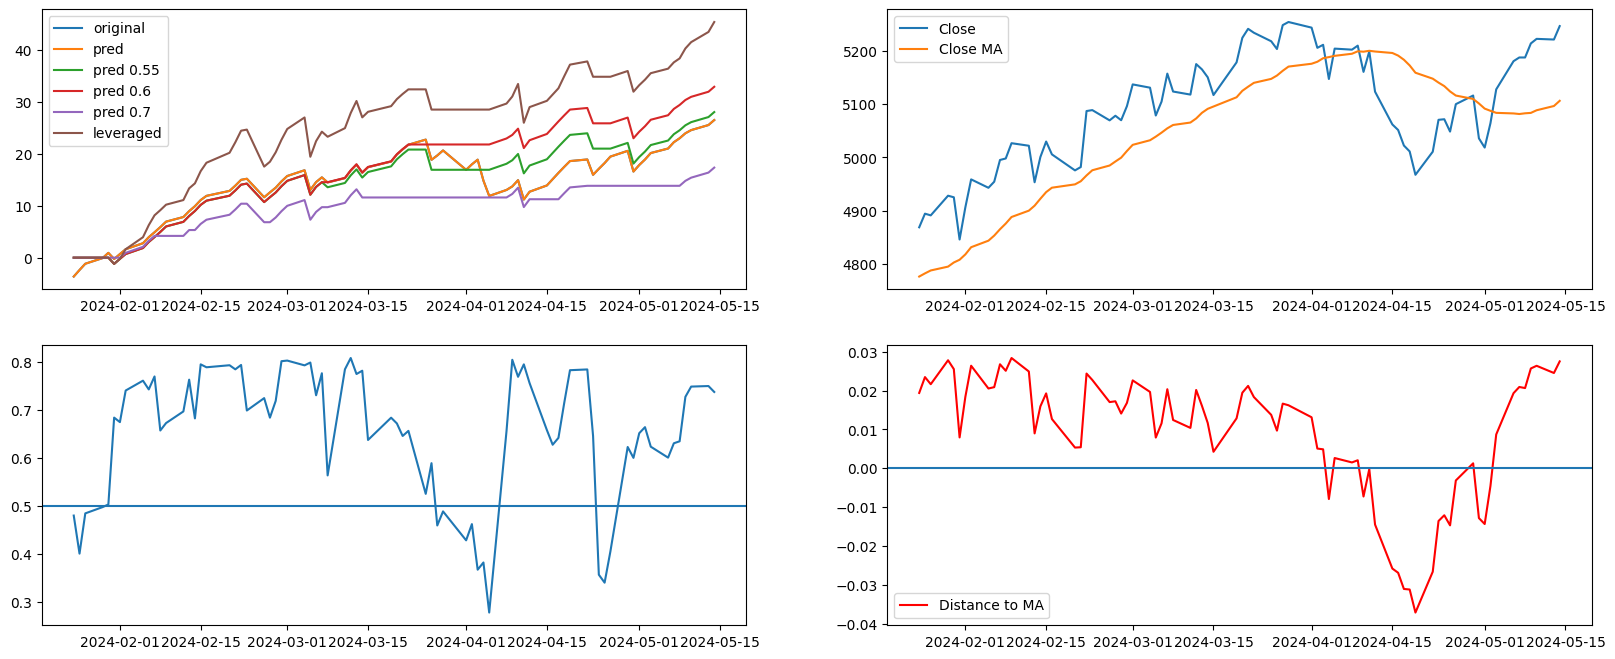

In [39]:

fig, ax = plt.subplots(2,2, figsize = (20,8))

ax[0,0].plot(compare_results['net_pnl'].cumsum(), label = 'original')
ax[0,0].plot((compare_results['pred_pnl']).cumsum(), label = 'pred')

for cut_off in cut_offs:
    ax[0,0].plot(compare_results[f'pred_pnl_{cut_off}'].cumsum(), label = f'pred {cut_off}')

ax[0,0].plot(compare_results[f'leveraged_pnl'].cumsum(), label = f'leveraged')

ax[0,0].legend()
ax[1,0].plot(compare_results['prob'], label = 'prob')
ax[1,0].axhline(0.5)

ax[0,1].plot(feats_orig['Close'].loc[compare_results.index], label = 'Close')
ax[0,1].plot(feats_orig['Close'].rolling(window=20, min_periods=1).mean().loc[compare_results.index], label = 'Close MA')
ax[0,1].legend()

ax[1,1].plot(feats_orig['Close'].loc[compare_results.index] / feats_orig['Close'].rolling(window=20, min_periods=1).mean().loc[compare_results.index]-1, label = 'Distance to MA', color = 'red')
ax[1,1].axhline(0)
ax[1,1].legend()

In [40]:
print('Original:', compare_results['net_pnl'].mean()/compare_results['net_pnl'].std())
print('Pred:', compare_results['pred_pnl'].mean()/compare_results['pred_pnl'].std())
print('Leveraged:', compare_results['leveraged_pnl'].mean()/compare_results['leveraged_pnl'].std())
for cut_off in cut_offs:
    rets = compare_results[f'pred_pnl_{cut_off}']
    print(cut_off, rets.mean()/rets.std())

Original: 0.21162935496199145
Pred: 0.21162935496199145
Leveraged: 0.2761373849134313
0.55 0.2743843877133172
0.6 0.34918300227327415
0.7 0.23078512115232622


In [41]:
leveraged_ecc = compare_results[f'leveraged_pnl'].cumsum()
original_ecc = compare_results['net_pnl'].cumsum()

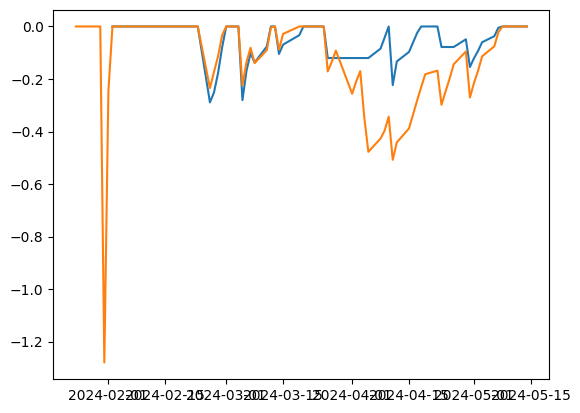

In [42]:
plt.plot(leveraged_ecc/leveraged_ecc.expanding().max()-1)
plt.plot(original_ecc/original_ecc.expanding().max()-1)